In [ ]:
    df_grouped = data.groupby(['camera','date','lat','lon']).agg({
        'pvpg': 'mean',
        'pv': 'max',
        'pg': 'max',
        'data_quantity': 'max',
        'pv_ratio': 'mean',
        'snr': 'mean',
        'msw_flag': 'mean',
        'segment_landcover': pd.Series.mode,
        'cloud_flag_atm': 'mean',
        'layer_flag': 'mean'
    }).reset_index()
    
    print(df_grouped)

# Torgnon

Nothing in rebinned section for torgnon file 18's beam 1.
Nothing in rebinned section for torgnon file 18's beam 2.


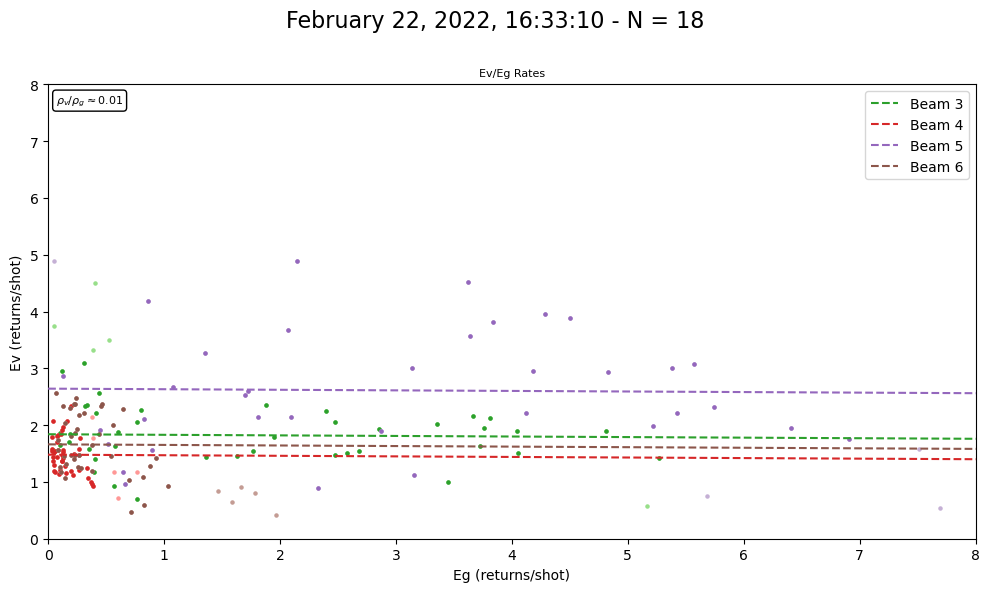

    camera        date        lat       lon  pvpg        pv          pg  \
0  torgnon  22/02/2022  45.824025  7.561223  0.01  2.642135  264.213542   

   data_quantity  pv_ratio       snr  msw_flag  segment_landcover  \
0             49   1.42661  0.895663  0.223464               30.0   

   cloud_flag_atm  layer_flag  
0        0.111732    0.122905  
Nothing in rebinned section for torgnon file 23's beam 1.
Nothing in rebinned section for torgnon file 23's beam 2.


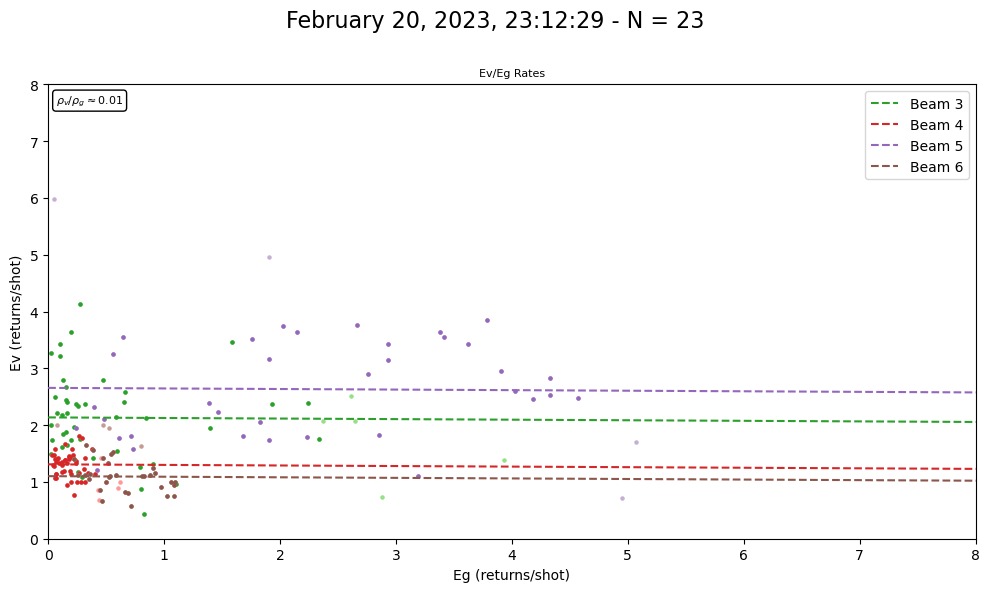

    camera        date        lat       lon  pvpg        pv          pg  \
0  torgnon  20/02/2023  45.824025  7.561223  0.01  2.655818  265.581811   

   data_quantity  pv_ratio        snr  msw_flag  segment_landcover  \
0             53  1.987303  54.425113  0.248588               30.0   

   cloud_flag_atm  layer_flag  
0        0.124294    0.124294  
Nothing in rebinned section for torgnon file 27's beam 1.
Nothing in rebinned section for torgnon file 27's beam 2.
Nothing in rebinned section for torgnon file 27's beam 3.
Nothing in rebinned section for torgnon file 27's beam 4.


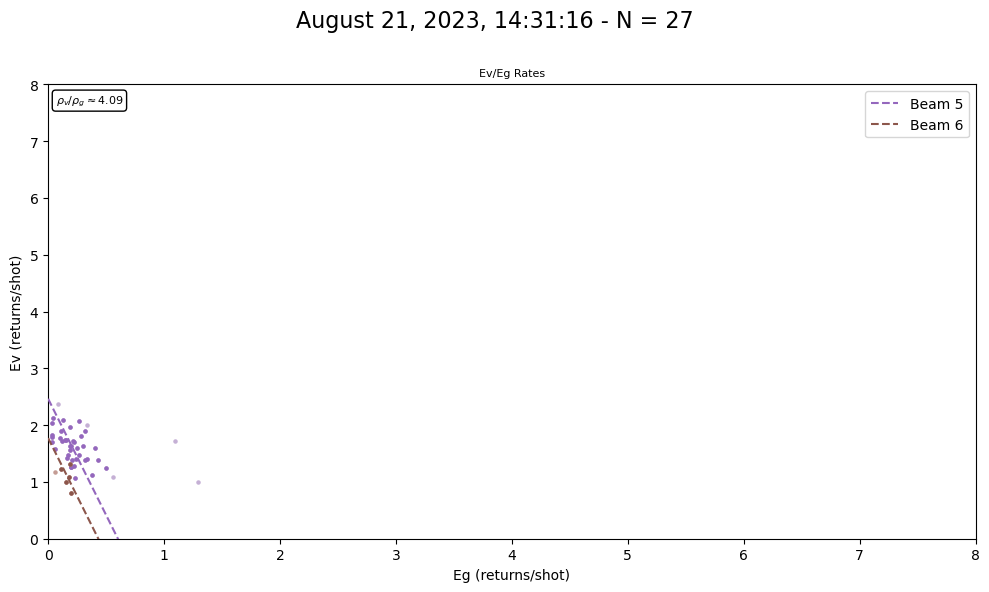

    camera        date        lat       lon      pvpg        pv        pg  \
0  torgnon  21/08/2023  45.824025  7.561223  4.094971  2.463874  0.601683   

   data_quantity  pv_ratio      snr  msw_flag  segment_landcover  \
0             43  1.390677  0.11911       2.0              126.0   

   cloud_flag_atm  layer_flag  
0        1.285714         0.0  


In [5]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/torgnon/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (7.5609, 45.8238)

# for i in range(N):
for i in [18,23,27]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=2091, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=2091, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=.1,method='bimodal', landcover='all')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=2091, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

    df_grouped = data.groupby(['camera','date','lat','lon']).agg({
        'pvpg': 'mean',
        'pv': 'max',
        'pg': 'max',
        'data_quantity': 'max',
        'pv_ratio': 'mean',
        'snr': 'mean',
        'msw_flag': 'mean',
        'segment_landcover': pd.Series.mode,
        'cloud_flag_atm': 'mean',
        'layer_flag': 'mean'
    }).reset_index()
    
    print(df_grouped)

# Lac Clair

Nothing in rebinned section for lacclair file 9's beam 3.
Nothing in rebinned section for lacclair file 9's beam 4.
Nothing in rebinned section for lacclair file 9's beam 5.
Nothing in rebinned section for lacclair file 9's beam 6.


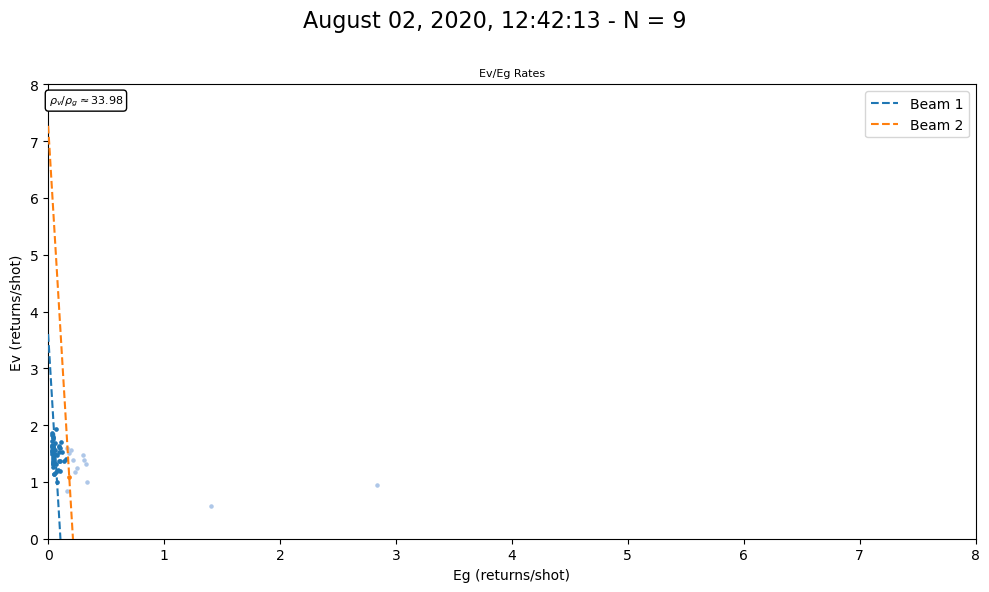

     camera        date        lat       lon       pvpg        pv        pg  \
0  lacclair  02/08/2020  46.952325 -71.66927  33.981963  7.269448  0.213921   

   data_quantity  pv_ratio_mean       snr  msw_flag  segment_landcover  \
0             57       0.495551  0.352358       1.0              114.0   

   cloud_flag_atm  layer_flag  
0        1.051724    0.362069  
Nothing in rebinned section for lacclair file 23's beam 1.
Nothing in rebinned section for lacclair file 23's beam 2.


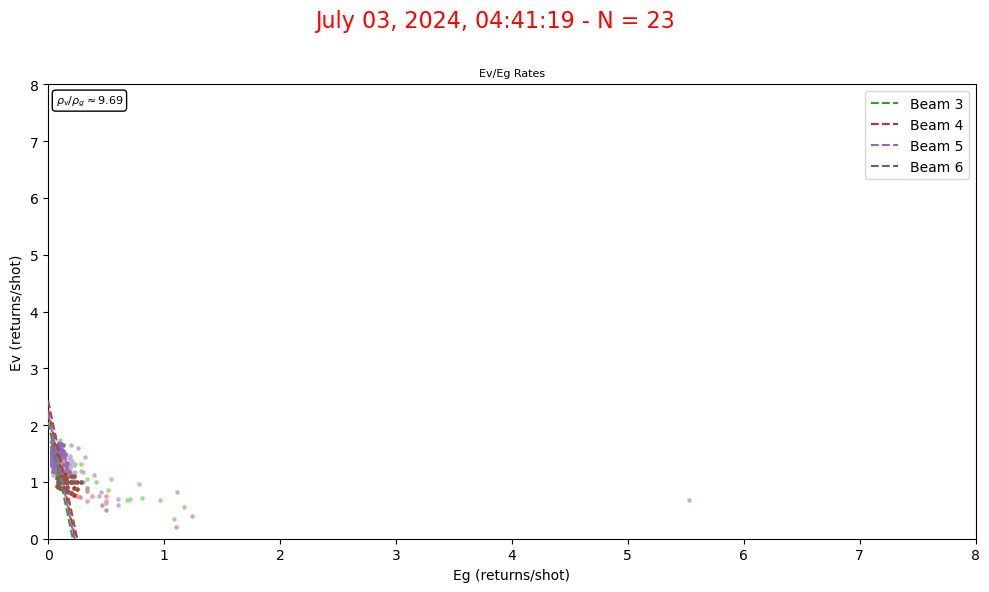

     camera        date        lat       lon    pvpg        pv        pg  \
0  lacclair  03/07/2024  46.952325 -71.66927  9.6868  2.431318  0.250993   

   data_quantity  pv_ratio_mean        snr  msw_flag  segment_landcover  \
0            121       0.906863  62.974683  0.042705              114.0   

   cloud_flag_atm  layer_flag  
0        0.042705         1.0  
Nothing in rebinned section for lacclair file 16's beam 3.
Nothing in rebinned section for lacclair file 16's beam 4.
Nothing in rebinned section for lacclair file 16's beam 5.
Nothing in rebinned section for lacclair file 16's beam 6.


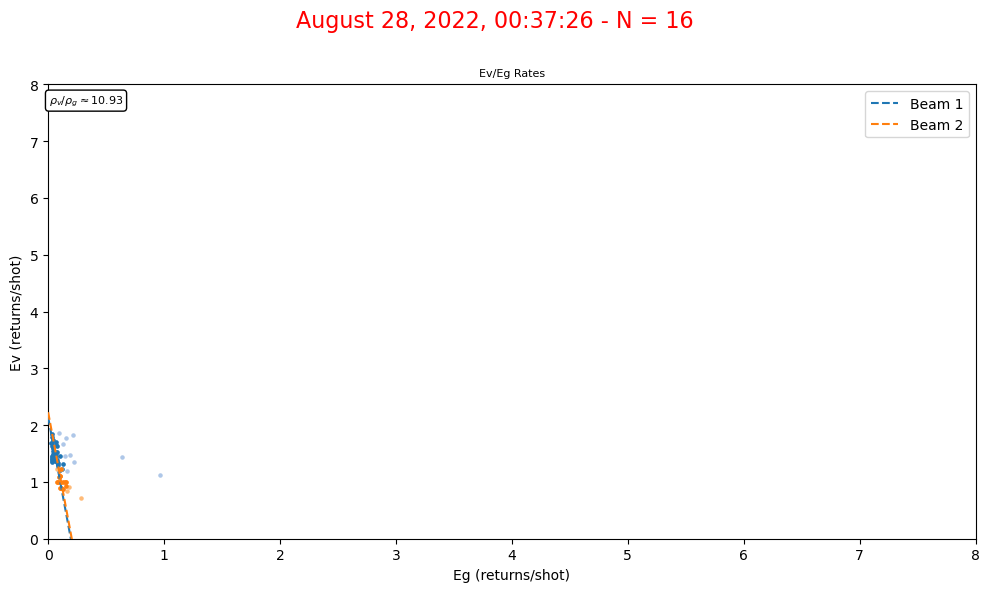

     camera        date        lat       lon       pvpg        pv        pg  \
0  lacclair  28/08/2022  46.952325 -71.66927  10.931703  2.227296  0.203746   

   data_quantity  pv_ratio_mean        snr  msw_flag  segment_landcover  \
0             45       0.960401  63.821087       0.0              114.0   

   cloud_flag_atm  layer_flag  
0             0.0         1.0  


In [11]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/lacclair/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-71.6696, 46.9521)

# for i in range(N):
for i in [9,23,16]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=313, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=313, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=.1,method='bimodal', landcover='all')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=313, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

    df_grouped = data.groupby(['camera','date','lat','lon']).agg({
        'pvpg': 'mean',
        'pv': 'max',
        'pg': 'max',
        'data_quantity': 'max',
        'pv_ratio_mean': 'mean',
        'snr': 'mean',
        'msw_flag': 'mean',
        'segment_landcover': pd.Series.mode,
        'cloud_flag_atm': 'mean',
        'layer_flag': 'mean'
    }).reset_index()
    
    print(df_grouped)

# Marcell

Nothing in rebinned section for marcell_MN file 1's beam 1.
Nothing in rebinned section for marcell_MN file 1's beam 2.
Nothing in rebinned section for marcell_MN file 1's beam 3.
Nothing in rebinned section for marcell_MN file 1's beam 4.


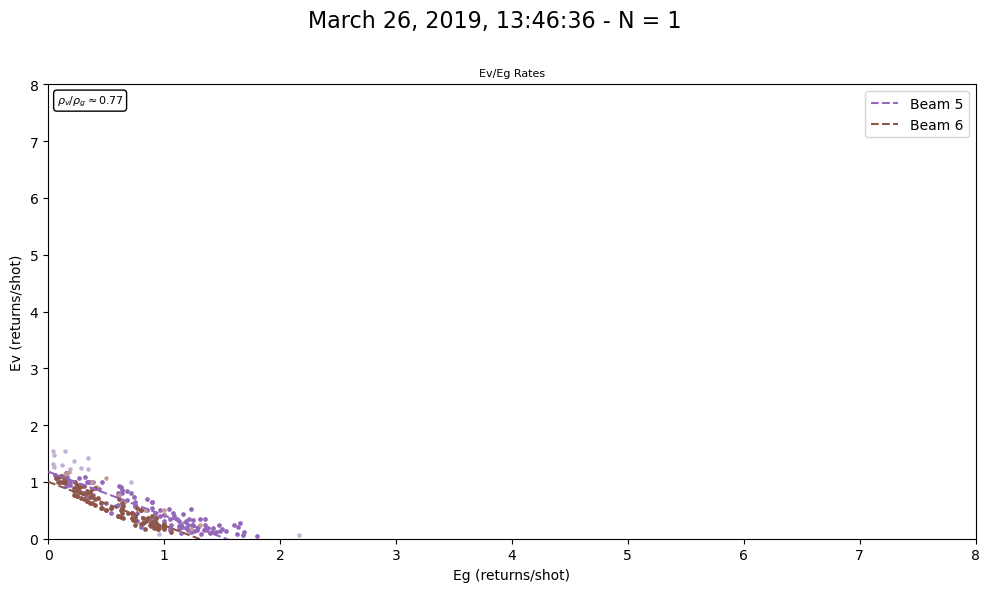

Nothing in rebinned section for marcell_MN file 3's beam 1.
Nothing in rebinned section for marcell_MN file 3's beam 2.
Nothing in rebinned section for marcell_MN file 3's beam 3.
Nothing in rebinned section for marcell_MN file 3's beam 4.


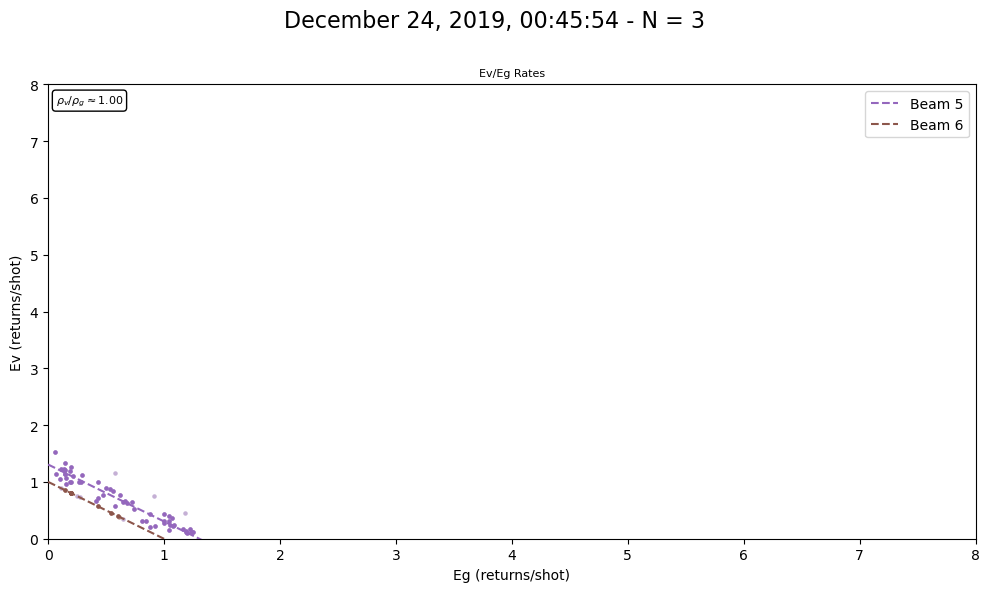

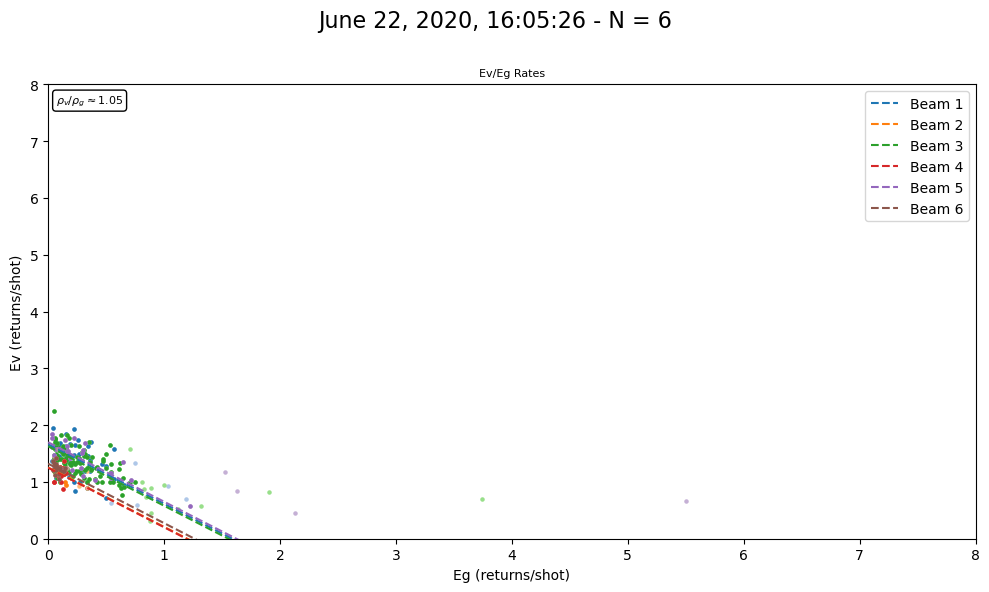

Nothing in rebinned section for marcell_MN file 14's beam 3.
Nothing in rebinned section for marcell_MN file 14's beam 4.
Nothing in rebinned section for marcell_MN file 14's beam 5.
Nothing in rebinned section for marcell_MN file 14's beam 6.


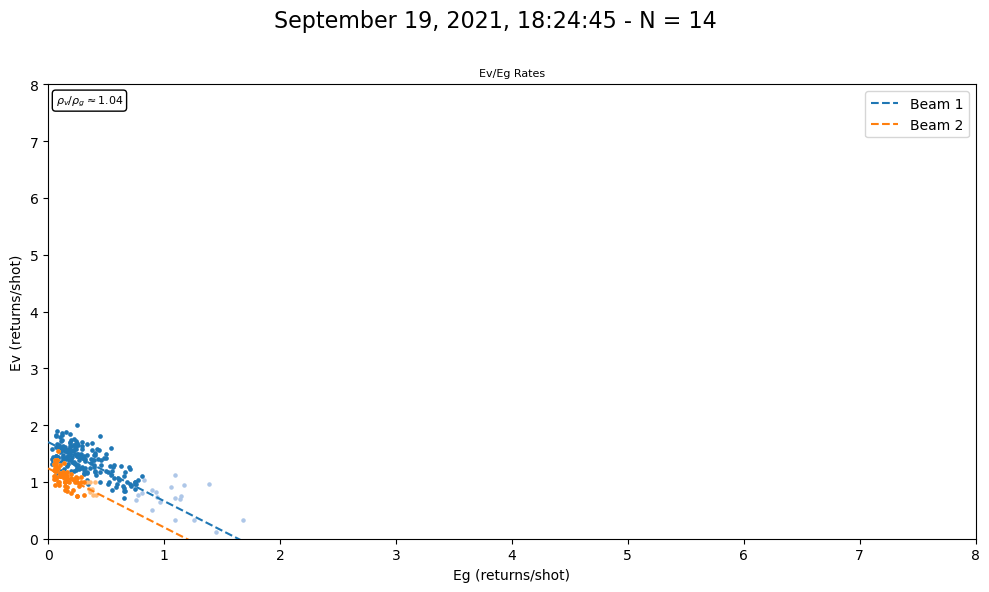

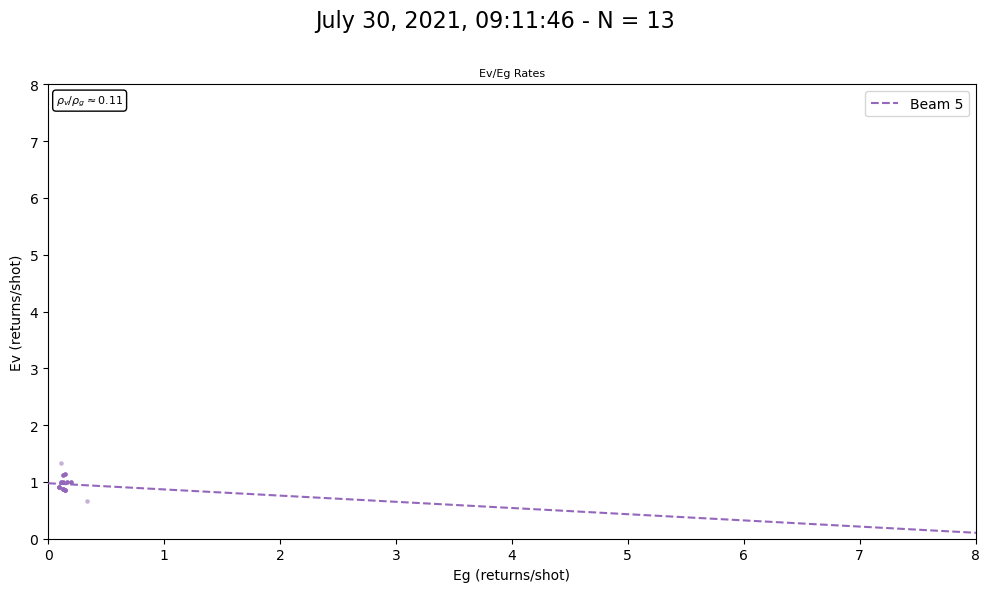

Nothing in rebinned section for marcell_MN file 22's beam 1.
Nothing in rebinned section for marcell_MN file 22's beam 2.
Nothing in rebinned section for marcell_MN file 22's beam 3.
Nothing in rebinned section for marcell_MN file 22's beam 4.


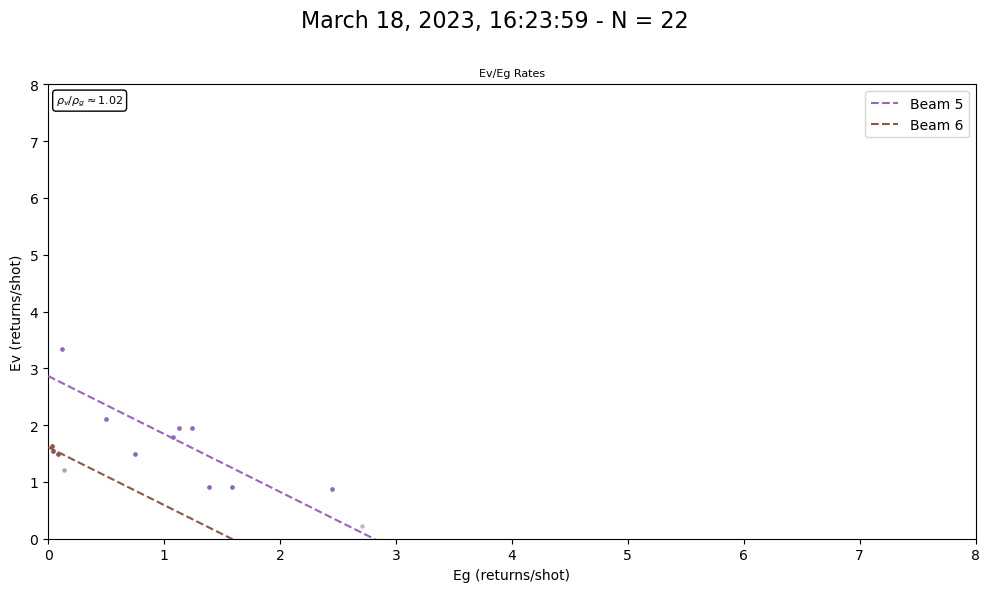

In [8]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/marcell_MN/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-93.4541, 47.5049)

# for i in range(N):
for i in [1,3,6,14,13,22]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=413, threshold=1, graph_detail=1)

    # BLOCKS
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=413, threshold=1, small_box=10, graph_detail=2, loss='linear', rebinned=0, f_scale=.05,\
    #                      outlier_removal=2,method='bimodal')
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=413, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=.1,method='bimodal', landcover='all')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=413, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

# Delta Junction

Nothing in rebinned section for delta_junction file 3's beam 1.
Nothing in rebinned section for delta_junction file 3's beam 2.


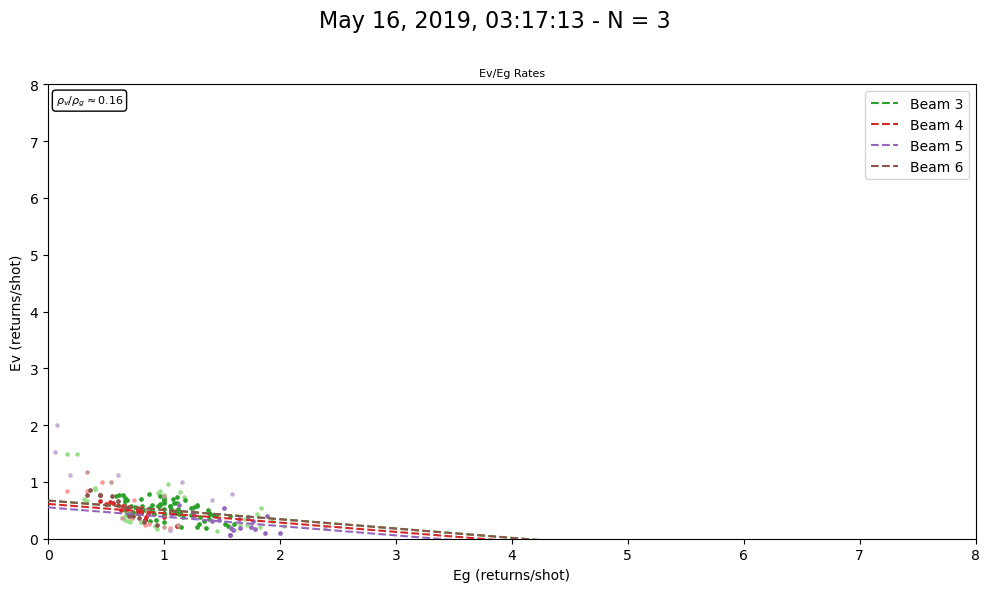

           camera        date        lat         lon      pvpg        pv  \
0  delta_junction  16/05/2019  63.881325 -145.750888  0.164273  0.672334   

        pg  data_quantity  pv_ratio_mean  pv_ratio_max       snr  msw_flag  \
0  4.09278            113       0.952569      1.001019  0.154837   0.06701   

   segment_landcover  cloud_flag_atm  layer_flag  
0              111.0         0.06701    0.108247  


In [7]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/delta_junction/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-145.7514, 63.8811)

# for i in range(N):
for i in [3]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=504, threshold=1, graph_detail=1)

    # BLOCKS
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
    #                      altitude=504, threshold=1, small_box=8, graph_detail=1, loss='linear', rebinned=0, f_scale=.05,\
    #                      outlier_removal=2,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
    #                      altitude=504, threshold=1, small_box=8.05, graph_detail=2, loss='linear', rebinned=0, f_scale=.05,\
    #                      outlier_removal=2,method='bimodal')
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=504, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,
                         outlier_removal=.3, method='bimodal', landcover='all')

    df_grouped = data.groupby(['camera','date','lat','lon']).agg({
        'pvpg': 'mean',
        'pv': 'max',
        'pg': 'max',
        'data_quantity': 'max',
        'pv_ratio_mean': 'mean',
        'pv_ratio_max': 'mean',
        'snr': 'mean',
        'msw_flag': 'mean',
        'segment_landcover': pd.Series.mode,
        'cloud_flag_atm': 'mean',
        'layer_flag': 'mean'
    }).reset_index()
    
    print(df_grouped)

# Sodankyla

Nothing in rebinned section for sodankyla_full file 30's beam 1.
Nothing in rebinned section for sodankyla_full file 30's beam 2.
Nothing in rebinned section for sodankyla_full file 30's beam 3.
Nothing in rebinned section for sodankyla_full file 30's beam 4.
51
8
51


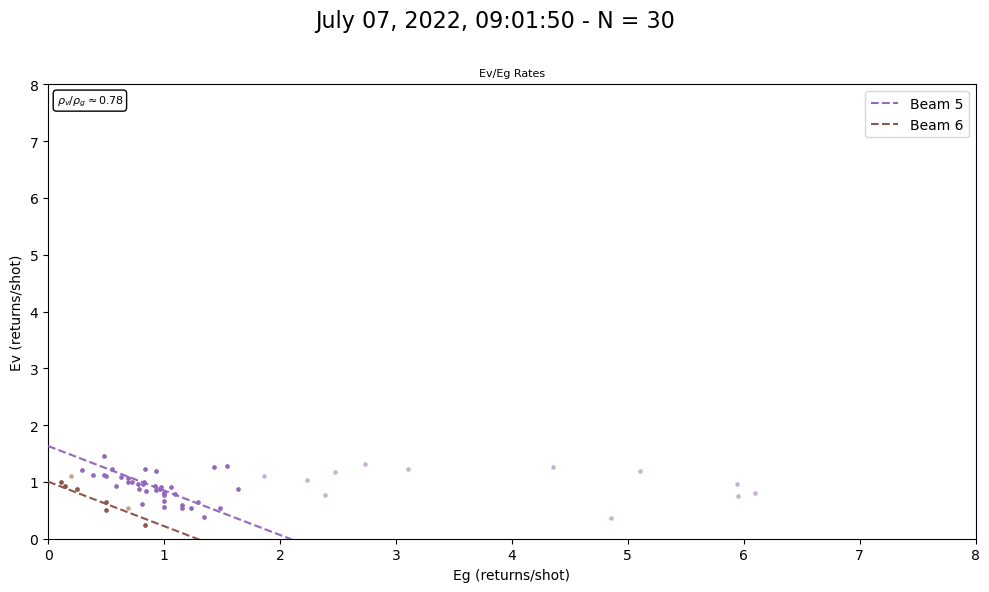

           camera        date        lat        lon      pvpg        pv  \
0  sodankyla_full  07/07/2022  67.362058  26.634739  0.782855  1.631691   

         pg  data_quantity  pv_ratio_max  pv_ratio_mean       snr  msw_flag  \
0  2.084283             51      1.624598       1.624598  0.633614  0.949153   

   segment_landcover  cloud_flag_atm  layer_flag  
0              111.0        0.474576    0.050847  


In [1]:
from scripts.parallel_blocks import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/sodankyla_full/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (26.634154, 67.361833)

# for i in range(N):
for i in [30]:
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=185, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=0.22,method='bimodal', landcover='all')

    df_grouped = data.groupby(['camera','date','lat','lon']).agg({
        'pvpg': 'mean',
        'pv': 'max',
        'pg': 'max',
        'data_quantity': 'max',
        'pv_ratio_max': 'mean',
        'pv_ratio_mean': 'mean',
        'snr': 'mean',
        'msw_flag': 'mean',
        'segment_landcover': pd.Series.mode,
        'cloud_flag_atm': 'mean',
        'layer_flag': 'mean'
    }).reset_index()
    
    print(df_grouped)